## **1. Data Understanding**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
file_path = '/Users/aadya/Downloads/New Folder With Items 2/New Folder With Items/uwaterloo/Projects/Breast Cancer Classification/data.csv'
data = pd.read_csv(file_path, header=0)
print(data.head())
print("\n----------\nColums: \n")
print(data.columns)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

 #### **1.1 EDA**

In [107]:
#Check for duplicates, missing values
data_duplicates = data.duplicated().sum()
data_null = data.isnull().sum().sum()
print("Total duplicated values: ", data_duplicates)
print("Total missing values: ", data_null)

Total duplicated values:  0
Total missing values:  569


In [108]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [109]:
#datatypes
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [110]:
#removing unnecessary columns
removed = data.columns.get_loc('Unnamed: 32')
selected_data = data.iloc[:, :removed]



sdata_duplicates = selected_data.duplicated().sum()
sdata_null = selected_data.isnull().sum().sum()

print("Total duplicated values: ", sdata_duplicates)
print("Total missing values: ", sdata_null)
print(f"\n----------\nColums: {selected_data.columns}\n")
print("----------")
selected_data.head()

Total duplicated values:  0
Total missing values:  0

----------
Colums: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

----------


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

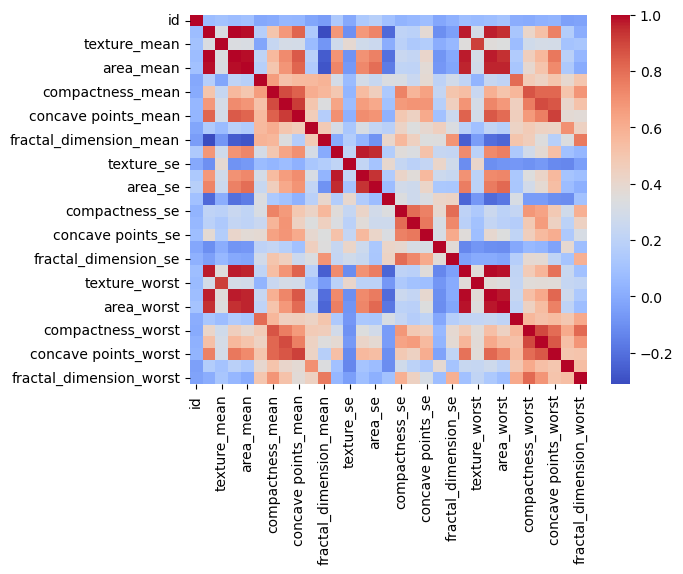

In [111]:
#understanding correlation of the numeric values
columns_corr = []
for i in range(len(selected_data.dtypes)):
    if selected_data.dtypes.iloc[i] != object:
        columns_corr.append(selected_data.columns[i])
numeric_data = selected_data.loc[:,columns_corr]
sns.heatmap(numeric_data.corr(), cmap = 'coolwarm')

**id column is entirely tending to 0 in the correlation above, so it can be safely assumed that it is not useful for other input variables**

In [112]:
diag = selected_data.loc[:,'diagnosis']

In [113]:
inputs = numeric_data
inputs.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [114]:
len(selected_data[selected_data.diagnosis=='M'])

212

In [115]:
len(selected_data[selected_data.diagnosis=='B'])

357

In [116]:
diag_encode = diag.map(lambda val: 'red' if val=='M' else 'blue')

<Figure size 640x480 with 0 Axes>

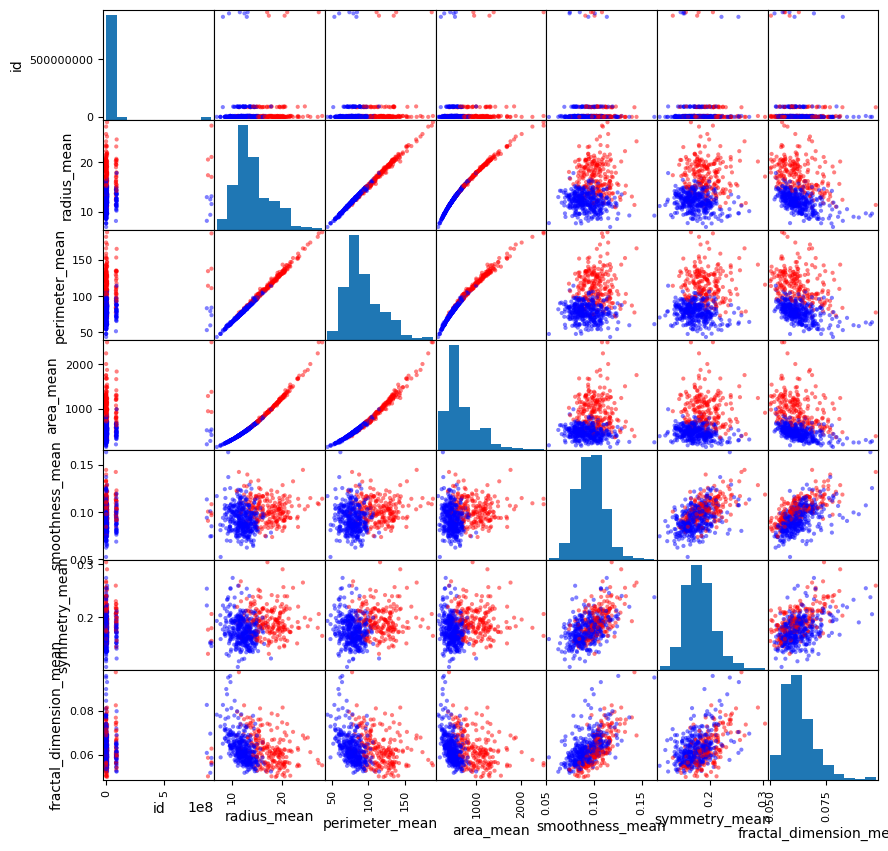

In [117]:
#plotting inputs w.r.t output
inputs_small = inputs.loc[:, ['id','radius_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'symmetry_mean','fractal_dimension_mean']]
plt.figure()
scatter = pd.plotting.scatter_matrix(inputs_small, c=diag_encode, figsize=(10,10))
plt.show()

**From the scatter plot, id is again shown to be not useful.**

In [118]:
#ID is not important but is important enough to not be deleted, thus made index
clean_input = inputs.set_index('id')
clean_input.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [119]:
count = 0
for i, feature in enumerate(clean_input.columns):
    count += 1
count

30

In [120]:
selected_data_i = selected_data.set_index('id')
selected_data_i.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


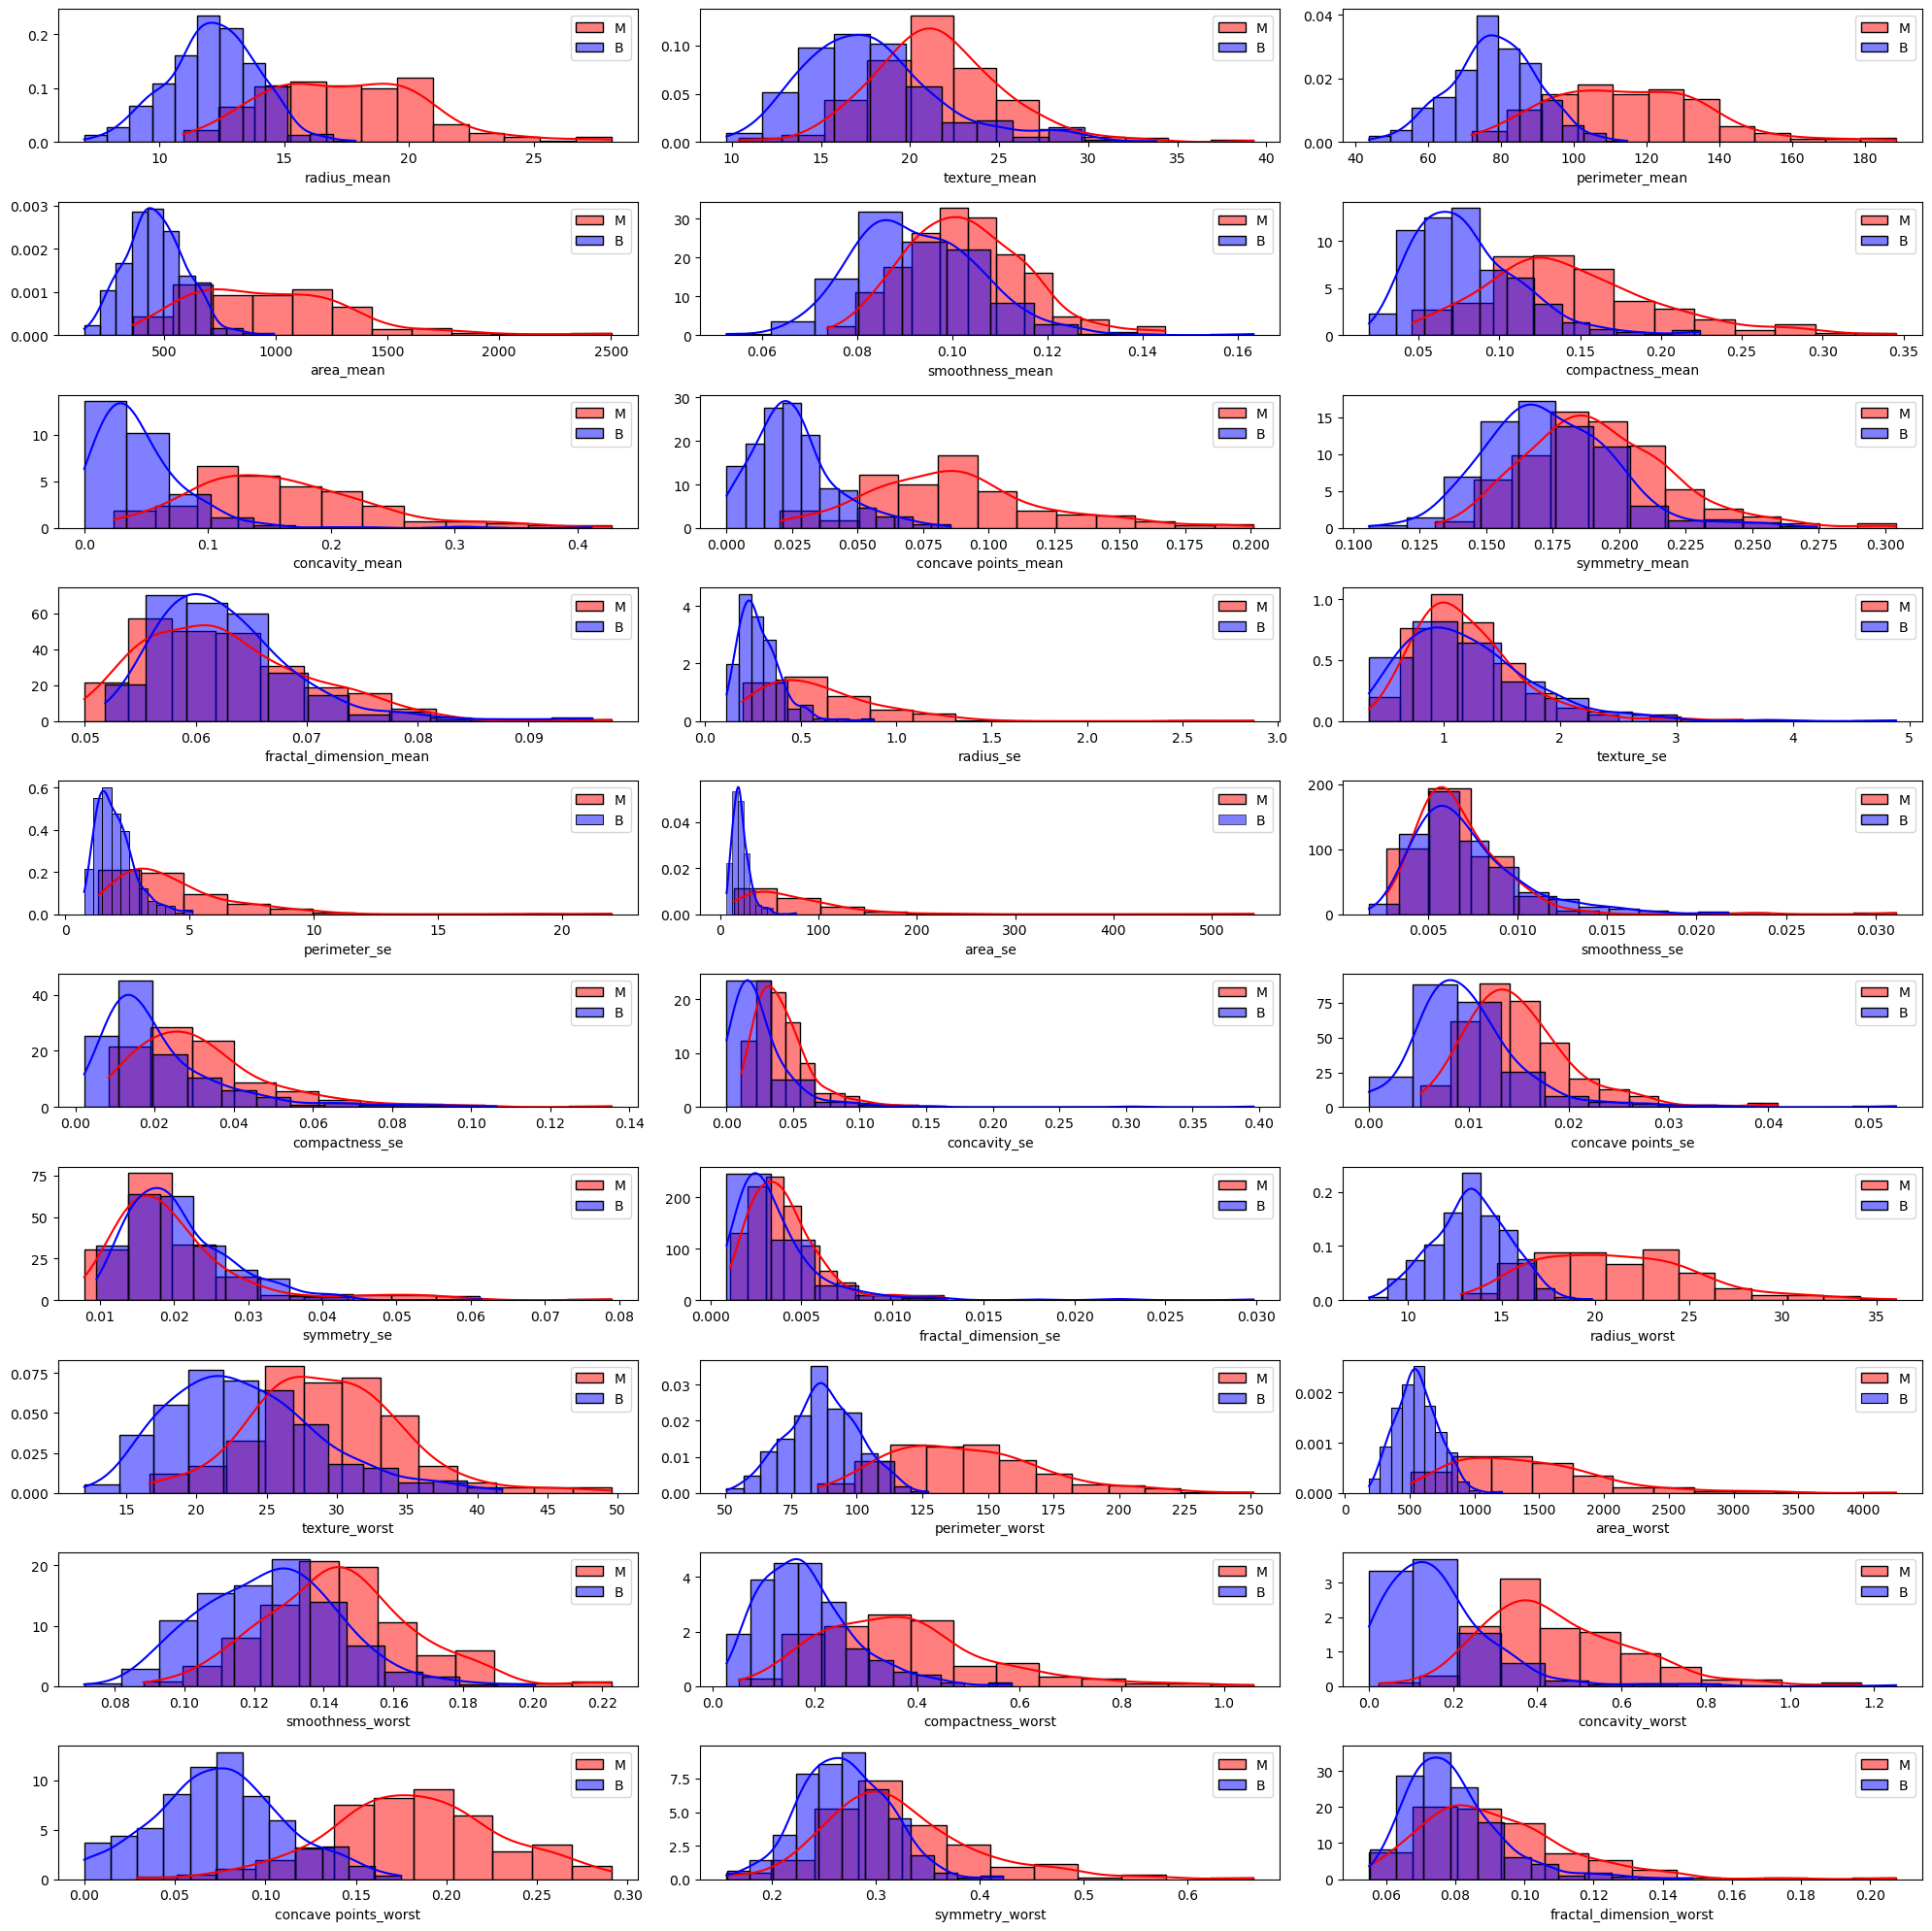

In [121]:
import warnings
warnings.filterwarnings('ignore')
bins = 12
plt.figure(figsize=(20,20))
for i, feature in enumerate(clean_input.columns):
  rows = 10
  cols = 3
  plt.subplot(rows,cols, i+1 )
  sns.histplot(selected_data_i[selected_data_i['diagnosis']=='M'][feature], bins=bins, color='red', label='M',kde=True, stat="density")
  sns.histplot(selected_data_i[selected_data_i['diagnosis']=='B'][feature], bins=bins, color='blue', label='B', kde=True, stat="density")
  plt.legend(loc='upper right')
  plt.ylabel('')
  plt.tight_layout()

plt.show()

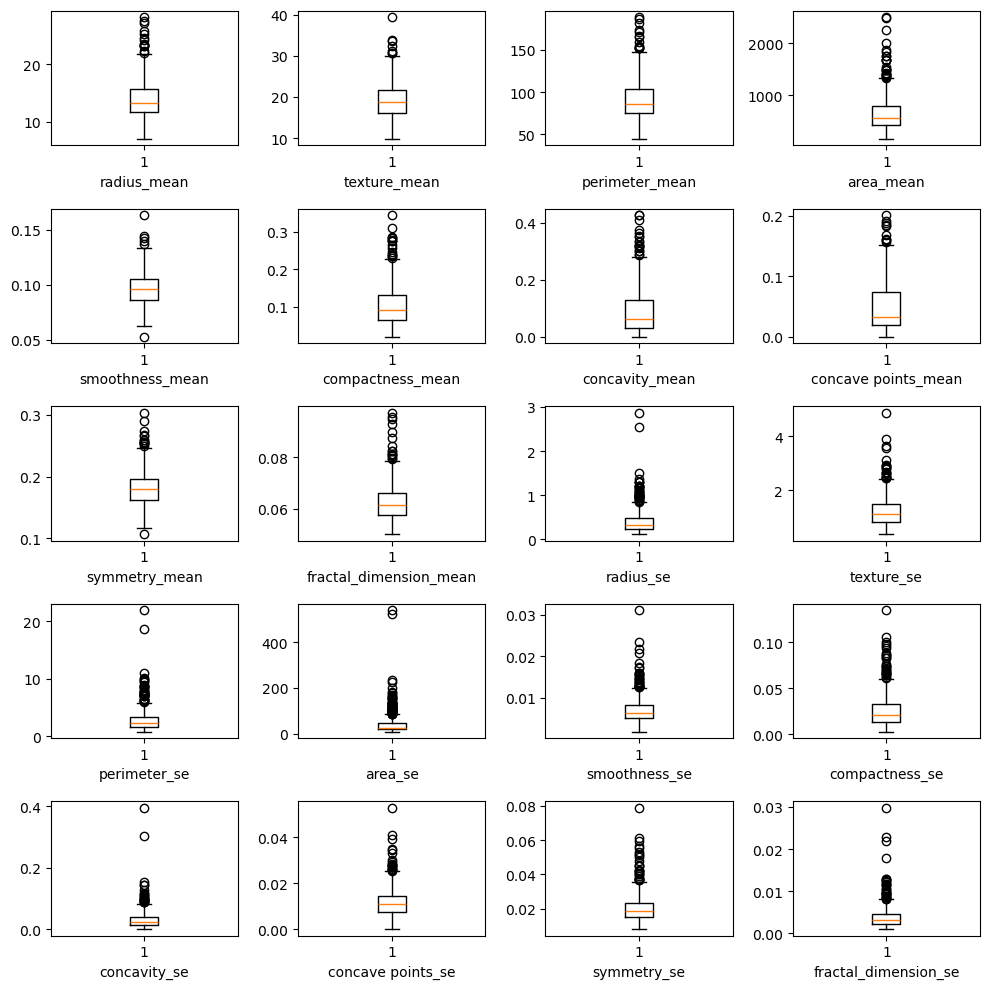

In [122]:
fig, ax = plt.subplots(5,4,figsize=(10,10))
# Plot boxplot side by side
for i, feature in enumerate(clean_input.columns):
    rows = 5
    cols = 4
    if i+ 1 == 21:
        break
    plt.subplot(rows,cols, i+1 )
    plt.boxplot(selected_data_i[feature])
    plt.xlabel(feature)
    plt.ylabel('')
    plt.tight_layout()

plt.show()

#### **1.2 Features**

In [123]:
#Now, M and B should also be numeric
#M --> 1 , B --> 0
encoding_logic = lambda value: 1 if value=='M' else 0
y = diag.map(encoding_logic)
x = clean_input

In [124]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)
print("x-train size: ", len(xtrain), ", y-train size: ", len(ytrain))
print("x-test size: ", len(xtest), ", y-test size: ", len(ytest))

x-train size:  455 , y-train size:  455
x-test size:  114 , y-test size:  114


In [125]:
# Split the 20% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(xtest, ytest, test_size=0.50, random_state=1)
print("x-train size: ", len(xtrain), ", y-train size: ", len(ytrain))
print("x-cv size: ", len(x_cv), ", y-cv size: ", len(y_cv))
print("x-test size: ", len(x_test), ", y-test size: ", len(y_test))

x-train size:  455 , y-train size:  455
x-cv size:  57 , y-cv size:  57
x-test size:  57 , y-test size:  57


In [126]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
845636,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.11810,0.1551,0.1459,0.09975,0.2948,0.08452
87139402,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.1266,0.1242,0.09391,0.2827,0.06771
905190,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151
907914,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.14190,0.7090,0.9019,0.24750,0.2866,0.11550
852781,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.13380,0.2117,0.3446,0.14900,0.2341,0.07421


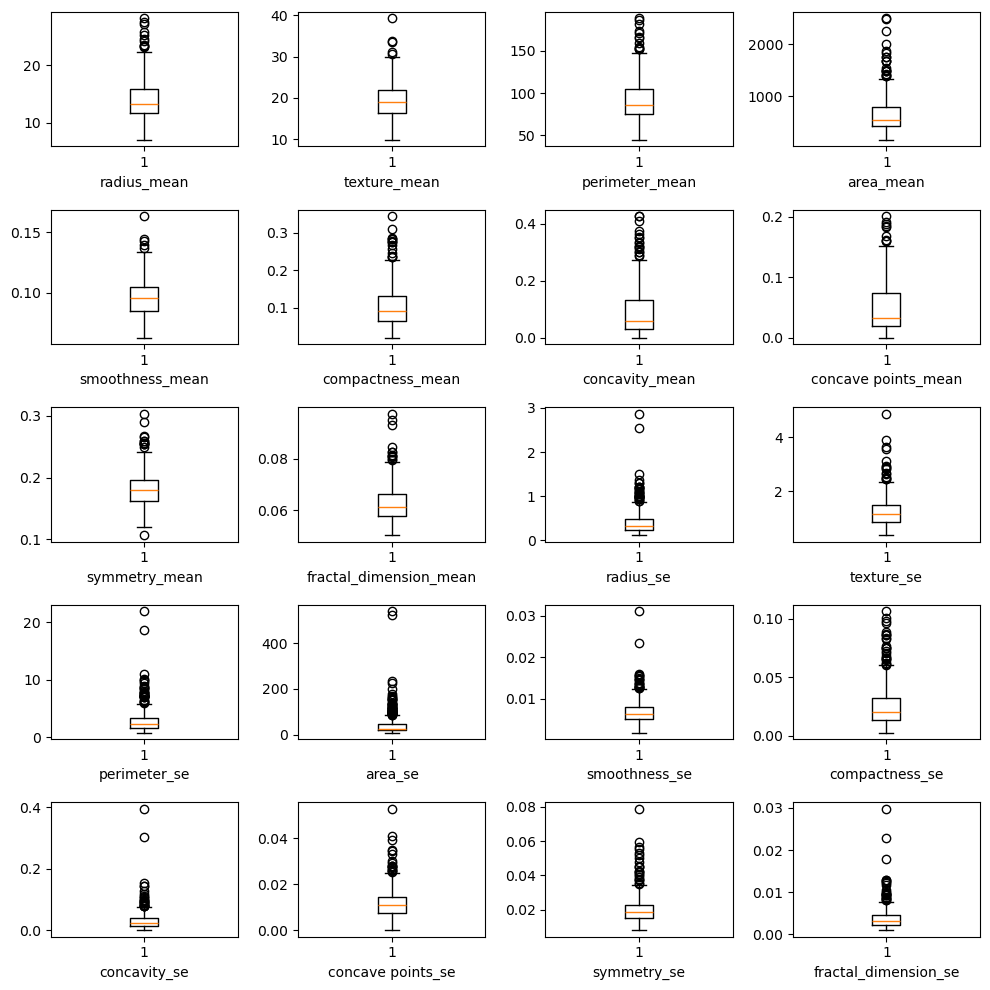

In [127]:
plt.figure(figsize=(10,10))
# Plot boxplot side by side
for i, feature in enumerate(xtrain.columns):
    rows = 5
    cols = 4
    if i+ 1 == 21:
        break
    plt.subplot(rows,cols, i + 1)
    plt.boxplot(xtrain[feature])
    plt.xlabel(feature)
    plt.ylabel('')
    plt.tight_layout()


plt.show()

In [128]:
# Feature Scaling
# Z-Score
#stat = xtrain.describe().T
#m = stat['mean']
#std = stat['std']
#scaled_input = (xtrain-m)/std
#scaled_input.head()
from sklearn.preprocessing import RobustScaler, StandardScaler
# Initialize the class
standard = StandardScaler()
robust = RobustScaler()
# Compute the mean and standard deviation of the training set then transform it
x_train_scaled_stan = standard.fit_transform(xtrain)
x_cv_scaled_stan = standard.transform(x_cv)
x_test_scaled_stan = standard.transform(x_test)


x_train_scaled_r = robust.fit_transform(xtrain)
x_cv_scaled_r = robust.transform(x_cv)
x_test_scaled_r = robust.transform(x_test)

print(f"{x_train_scaled_stan[:4, :]}")
print("\n--------\n")
print(f"{x_train_scaled_r[:4, :]}")

[[ 0.518559  0.891826  0.424632  0.383925 -0.974744 -0.689772 -0.688586
  -0.398175 -1.039155 -0.825056 -0.109318 -0.055976 -0.210096 -0.015913
  -1.005184 -0.911942 -0.662816 -0.652561 -0.701889 -0.275394  0.579798
   1.313242  0.466908  0.445983 -0.596155 -0.634722 -0.610227 -0.235744
   0.054566  0.021837]
 [-0.516364 -1.63971  -0.541349 -0.542961  0.476219 -0.631834 -0.604281
  -0.303075  0.521543 -0.454523 -0.604378 -1.001046 -0.585429 -0.493454
   0.403212 -0.768173 -0.479187  0.114508 -0.142951 -0.577398 -0.582459
  -1.690291 -0.611934 -0.587014  0.273582 -0.814844 -0.712666 -0.323208
  -0.137576 -0.904402]
 [-0.368118  0.455515 -0.38825  -0.40297  -1.432979 -0.383927 -0.342175
  -0.765459 -0.850857 -0.226171  0.30398   1.051501 -0.169545 -0.000809
  -0.310104  1.10633   0.622585  0.273685  0.754483  1.508105 -0.398622
   0.181977 -0.475431 -0.420778 -1.622785 -0.391399 -0.431313 -0.890825
  -0.675893 -0.144016]
 [ 0.205285  0.726168  0.40033   0.070612  0.243253  2.203585  2.25

In [129]:
def GFG(arr,prec):
    np.set_printoptions(suppress=True,precision=prec)
    return arr
x_train_range = xtrain.to_numpy()
ptpr = np.ptp(x_train_range,axis=0)
ptpn = np.ptp(x_train_scaled_stan,axis=0)
ptprb = np.ptp(x_train_scaled_r,axis=0)
print(f"Peak to Peak range by column in Raw X:{GFG(ptpr,6)}")
print("\n")
print(f"Peak to Peak range by column in Standardized X:{GFG(ptpn, 6)}")
print("\n")
print(f"Peak to Peak range by column in Standardized X:{GFG(ptprb, 6)}")
print("\n")
print(f"diff stand:{GFG(ptpn,6) - GFG(ptpr,6)}")
print(f"diff r:{GFG(ptprb,6) - GFG(ptpr,6)}")


Peak to Peak range by column in Raw X:[  21.129      29.57      144.71     2357.5         0.10089     0.32602
    0.4268      0.2012      0.198       0.0472      2.7615      4.5248
   21.223     535.398       0.029417    0.104148    0.396       0.05279
    0.071068    0.028945   28.11       37.52      200.79     4068.8
    0.15143     1.03071     1.252       0.291       0.5073      0.15246 ]


Peak to Peak range by column in Standardized X:[ 5.909969  6.899311  5.861091  6.548204  7.058227  6.054117  5.229868
  5.075382  7.169795  6.778751  9.52689   8.201486 10.007146 11.07774
 10.316431  5.915932 12.494321  8.402906  8.560912 11.009535  5.741834
  6.178321  5.881639  6.9946    6.45609   6.514169  5.910312  4.358221
  8.055696  8.400613]


Peak to Peak range by column in Standardized X:[ 5.000947  5.381256  4.944815  6.284991  5.103187  4.894093  4.156603
  3.699209  5.937031  5.403549 10.986672  7.140287 11.987009 19.444271
  9.926438  5.472832 15.544652  7.590769  8.894618 12.698048

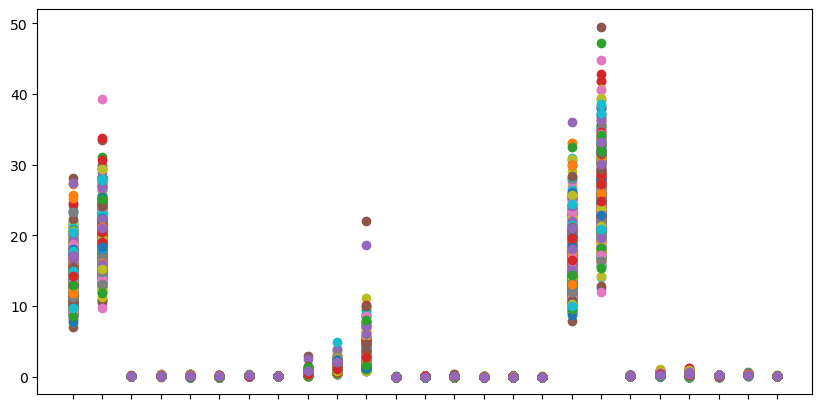

In [130]:
for_plotting = xtrain.copy()
for_plotting = for_plotting.drop( for_plotting.columns[[2,3,13,22,23]], axis = 1)


fig, ax = plt.subplots(1, 1, figsize = (10,5))
for i in range(len(for_plotting)):
    ax.scatter(for_plotting.columns, for_plotting.iloc[i,:])
ax.tick_params(axis='x', labelbottom=False)
plt.show()

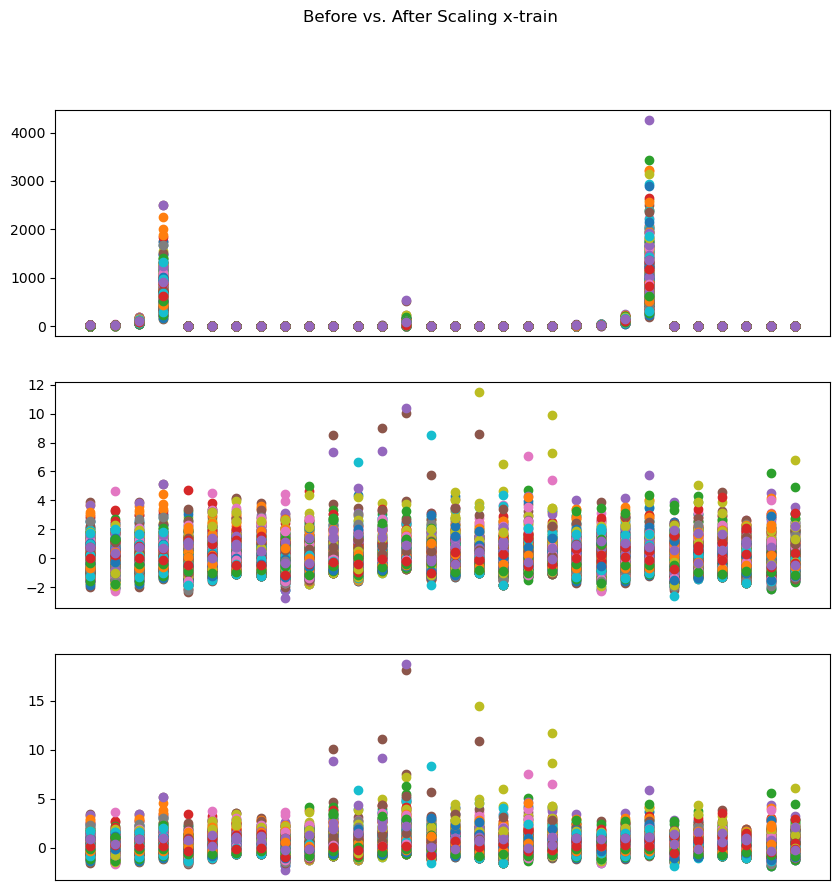

In [131]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (10,10))
fig.suptitle('Before vs. After Scaling x-train')
for i in range(len(xtrain)):
    ax1.scatter(xtrain.columns,xtrain.iloc[i,:])
ax1.get_xaxis().set_visible(False)
for i in range(len(xtrain)):
    ax2.scatter(xtrain.columns, x_train_scaled_stan[i])#plt.xlabel('features')
ax2.get_xaxis().set_visible(False)
for i in range(len(xtrain)):
    ax3.scatter(xtrain.columns,x_train_scaled_r[i])
ax3.get_xaxis().set_visible(False)
plt.xlabel('Features')
plt.show()

**I will use RobustScaler.**

In [132]:
x_train_scaled = x_train_scaled_r.copy()
x_cv_scaled = x_cv_scaled_r.copy()
x_test_scaled = x_test_scaled_r.copy()
del x_train_scaled_r, x_cv_scaled_r, x_test_scaled_r, x_train_scaled_stan, x_cv_scaled_stan, x_test_scaled_stan

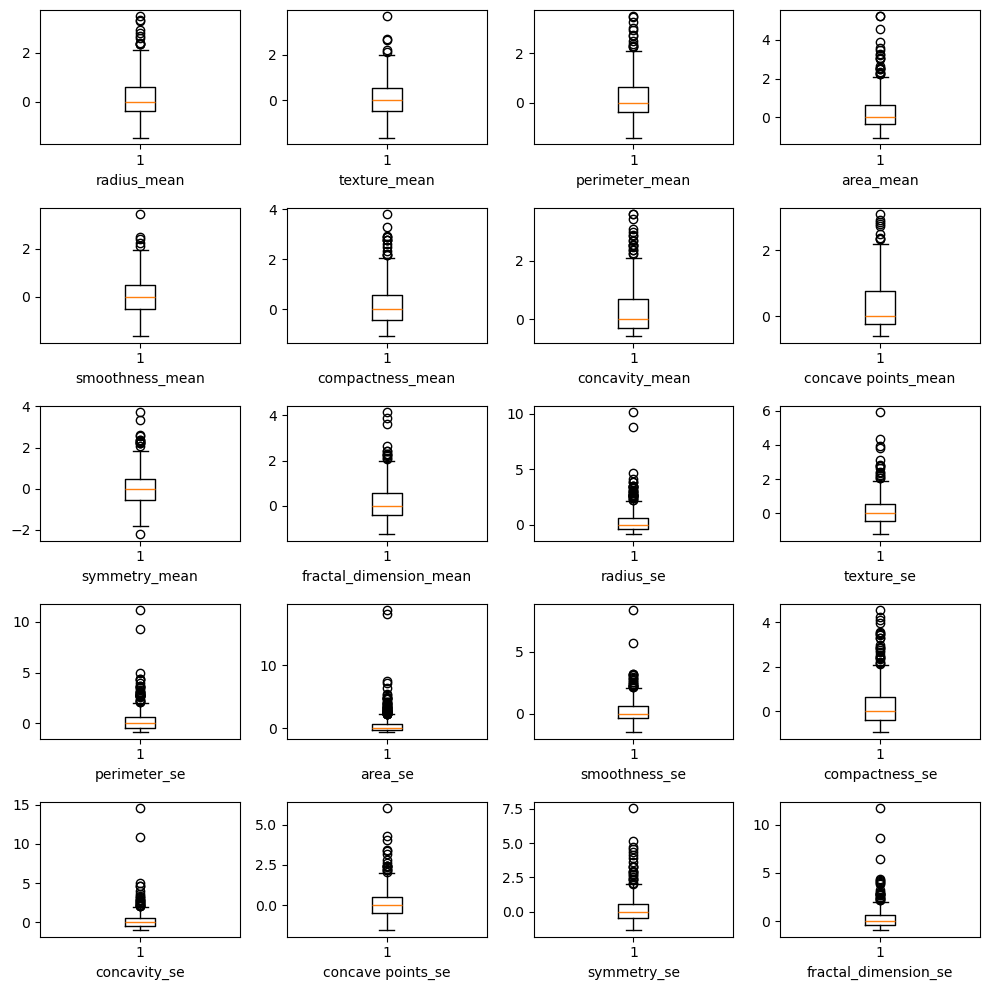

In [133]:
plt.figure(figsize=(10,10))

for i, feature in enumerate(xtrain.columns):
    rows = 5
    cols = 4
    if i+ 1 == 21:
        break
    plt.subplot(rows,cols, i + 1)
    plt.boxplot(x_train_scaled[:,i])
    plt.xlabel(feature)
    plt.ylabel('')
    plt.tight_layout()


plt.show()

In [134]:
#x_train_scaled.to_csv('/Users/aadya/Downloads/New Folder With Items 2/New Folder With Items/uwaterloo/Projects/Breast Cancer Classification/cleaned_n_scaled.csv')

## **2. Model**

In [135]:
y.unique()

array([1, 0])

In [136]:
y_test.to_numpy()

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # TREE based 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC # graph
import time
from sklearn.metrics import accuracy_score
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#### **2.1 Tuning Parameters**

**2.1.1 Determining parameters of Decision Tree**

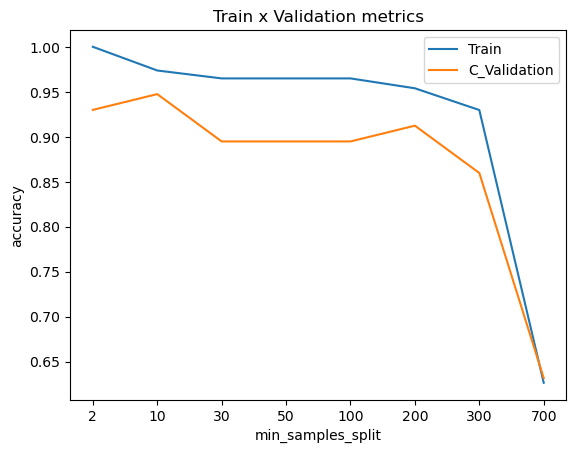

In [138]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

accuracy_list_train = []
accuracy_list_cv = []
for min_samples_split in min_samples_split_list:
   
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 55).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

**min_samples_split can be chosen to be 30. Here, the validation accuracy and train accuracy is high, and the train accuracy is closer to validation accuracy, which avoids overfitting.** 

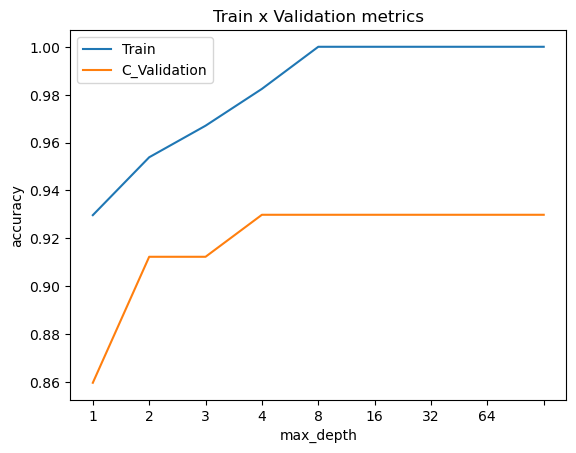

In [139]:
accuracy_list_train = []
accuracy_list_cv = []
for max_depth in max_depth_list:
    
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 55).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

**max_depth should be 3**

In [140]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 30,
                                             max_depth = 3,
                                             random_state = 55)

**2.1.2 Determining parameters of Random Forest**

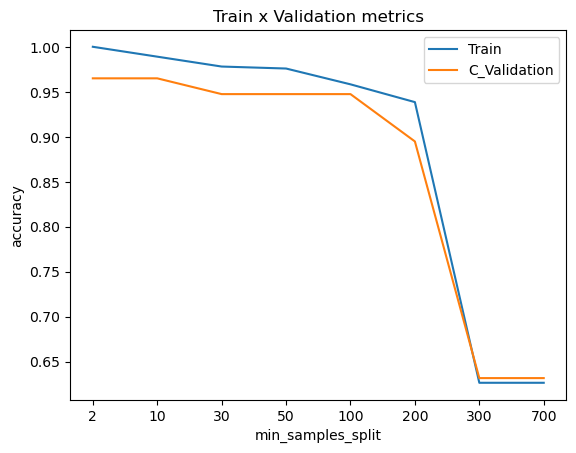

In [141]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

accuracy_list_train = []
accuracy_list_cv = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 55).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

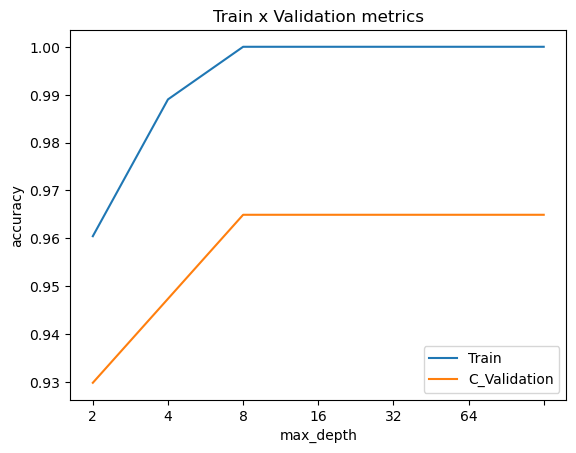

In [142]:
accuracy_list_train = []
accuracy_list_cv = []
for max_depth in max_depth_list:

    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 55).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

**min_samples_split = 30, max_depth = 4**

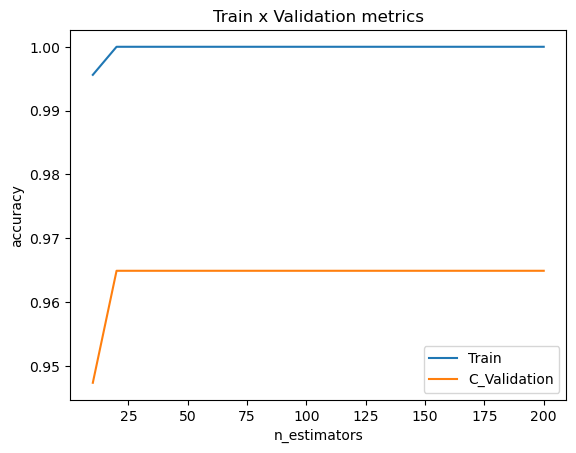

In [143]:
accuracy_list_train = []
accuracy_list_cv = []
estimations = [n for n in range(1, 201) if n % 10 == 0]
for est in estimations:
    model = RandomForestClassifier(n_estimators= est,
                                   random_state = 55).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)
#print(accuracy_list_train[:5])


plt.plot(estimations, accuracy_list_train)
plt.plot(estimations,accuracy_list_cv)
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend(['Train','C_Validation'])

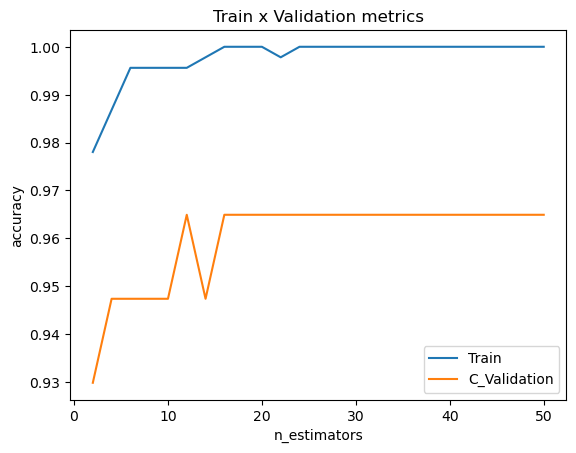

In [144]:
accuracy_list_train = []
accuracy_list_cv = []
estimations = [n for n in range(1, 51) if n % 2 == 0]
for est in estimations:
    model = RandomForestClassifier(n_estimators= est,
                                   random_state = 55).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)
#print(accuracy_list_train[:5])


plt.plot(estimations, accuracy_list_train)
plt.plot(estimations,accuracy_list_cv)
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend(['Train','C_Validation'])

In [145]:
random_forest_model = RandomForestClassifier(n_estimators = 37,
                                             max_depth = 4, 
                                             min_samples_split = 30, random_state = 55)

**2.1.3 Determining parameters of XGBoost**

In [146]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(10, 200)
}

# Create the XGBoost model object
xgb_model = XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, cv = 10, scoring='accuracy', n_iter = 10)
random_search.fit(x_train_scaled, ytrain)
cv_score = random_search.score(x_cv_scaled, y_cv)
print("Best: %f using %s, with cv score %f" % (random_search.best_score_, random_search.best_params_, cv_score))

Best: 0.969130 using {'learning_rate': 0.10770186195240529, 'max_depth': 9, 'n_estimators': 157, 'subsample': 0.8554571406530628}, with cv score 0.982456


**2.1.3 Determining parameters of Logistic Regression**

In [147]:
def plot_parameter(model_class, p_name, p_list):
    """
    Plots training and validation accuracy for a given model and hyperparameter.

    Args:
        model_class: The scikit-learn model class (e.g., LogisticRegression, SVC).
        p_name (str): The name of the hyperparameter to tune (e.g., 'C', 'kernel', 'n_neighbors').
        p_list (list): A list of values to test for the hyperparameter.
    """
    accuracy_list_train = []
    accuracy_list_val = []

    for p_value in p_list:
        # Create a dictionary for the parameter to pass to the model constructor
        model_params = {p_name: p_value}

        # Instantiate the model with the current parameter value
        model = model_class(**model_params)

        # Fit the model
        model.fit(x_train_scaled, ytrain)

        # Make predictions
        predictions_train = model.predict(x_train_scaled)
        predictions_val = model.predict(x_cv_scaled)

        # Calculate accuracy
        accuracy_train = accuracy_score(predictions_train, ytrain)
        accuracy_val = accuracy_score(predictions_val, y_cv)

        accuracy_list_train.append(accuracy_train)
        accuracy_list_val.append(accuracy_val)

    plt.figure(figsize=(10, 6))
    plt.title(f'Train vs Validation Accuracy for {model_class.__name__} - Tuning {p_name}')
    plt.xlabel(p_name)
    plt.ylabel('Accuracy')
    plt.plot(p_list, accuracy_list_train, label='Train Accuracy', marker='o')
    plt.plot(p_list, accuracy_list_val, label='Validation Accuracy', marker='x')
    plt.xscale('log') # Useful for parameters like C that span wide ranges
    plt.xticks(ticks=p_list, labels=[str(p) for p in p_list]) # Ensure labels are correct
    plt.legend()
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.show()

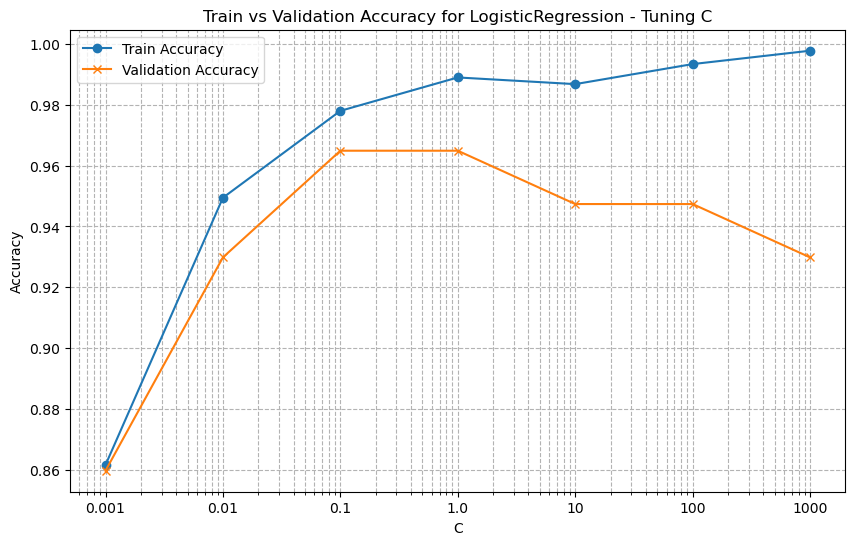

In [148]:
plot_parameter(LogisticRegression, 'C', [1000, 100, 10, 1.0, 0.1, 0.01, 0.001])

In [149]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']

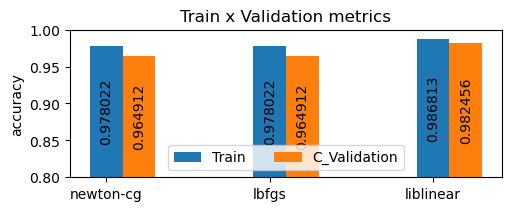

In [150]:
accuracy_list_train = []
accuracy_list_cv = []
for s in solvers:
    
    model = LogisticRegression(C = 0.15, solver = s, penalty= 'l2').fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)


dict_ = {
    'Train': accuracy_list_train,
    'C_Validation': accuracy_list_cv,
}

x = np.arange(len(solvers))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (5,2))

for attribute, measurement in dict_.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, label_type = 'center', rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('accuracy')
ax.set_title('Train x Validation metrics')
ax.set_xticks(range(len(solvers)),solvers)
ax.legend(['Train','C_Validation'], ncols=2)
ax.set_ylim(0.8, 1.0)

plt.show()

**C=0.1, solver = 'liblinear'**

In [183]:
LogisticR = LogisticRegression(C = 0.06, solver = 'liblinear', penalty = 'l2')

**2.1.3 Determining parameters of SVC**

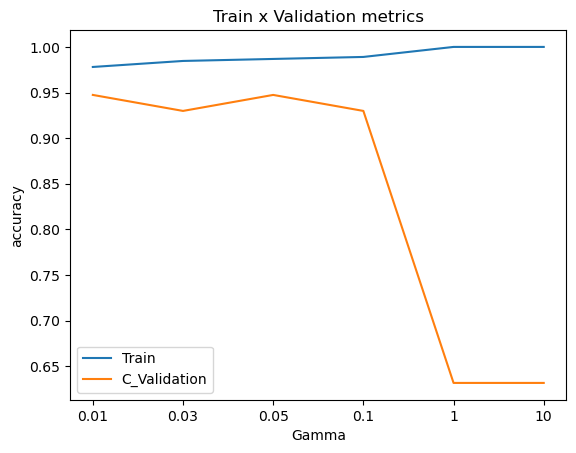

In [152]:
kernels = ['linear', 'rbf', 'poly']
gammas = [0.01,0.03, 0.05,0.1, 1, 10]
accuracy_list_train = []
accuracy_list_cv = []
for s in gammas:
    
    model = SVC(gamma = s).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('Gamma')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(gammas)),labels=gammas)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

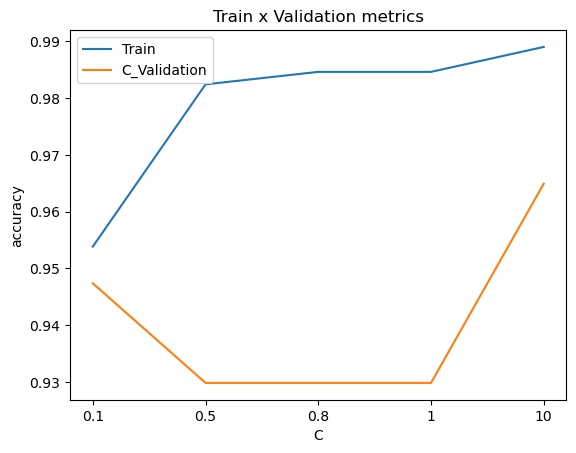

In [153]:
cs = [0.1, 0.5, 0.8, 1, 10]
accuracy_list_train = []
accuracy_list_cv = []
for s in cs:
    
    model = SVC(C = s).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(cs)),labels=cs)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

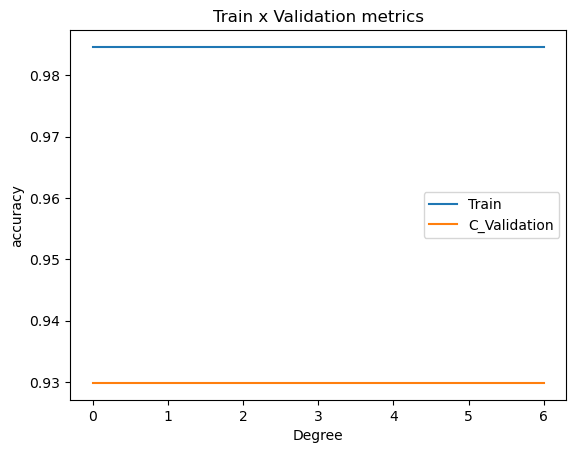

In [154]:
accuracy_list_train = []
accuracy_list_cv = []
degrees = [0,1,2,3,4,5,6]
for s in degrees:
    
    model = SVC(degree = s).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('Degree')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(degrees)),labels=degrees)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

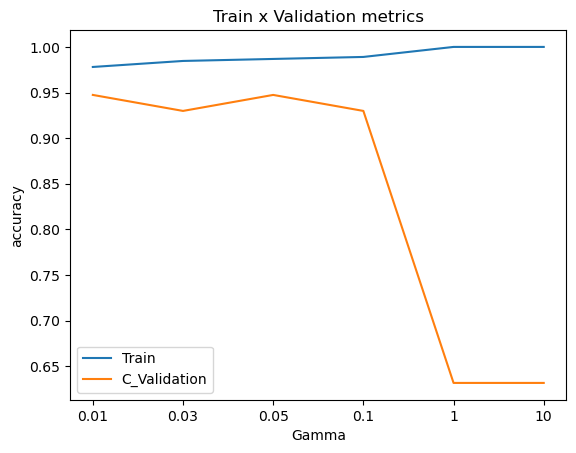

In [155]:
accuracy_list_train = []
accuracy_list_cv = []
for s in gammas:
    
    model = SVC(gamma = s).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('Gamma')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(gammas)),labels=gammas)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','C_Validation'])

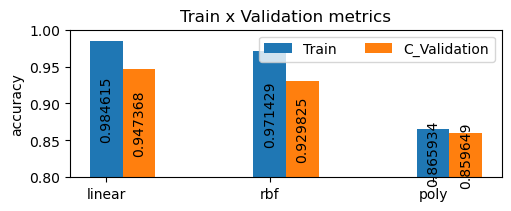

In [156]:
accuracy_list_train = []
accuracy_list_cv = []
for s in kernels:
    
    model = SVC(kernel = s, gamma = 0.04, C = 0.3, degree = 5).fit(x_train_scaled,ytrain) 
    predictions_train = model.predict(x_train_scaled) ## The predicted values for the train dataset
    predictions_cv = model.predict(x_cv_scaled) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,ytrain)
    accuracy_cv = accuracy_score(predictions_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

dict_ = {
    'Train': accuracy_list_train,
    'C_Validation': accuracy_list_cv,
}

x = np.arange(len(kernels))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (5,2))

for attribute, measurement in dict_.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, label_type = 'center', rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('accuracy')
ax.set_title('Train x Validation metrics')
ax.set_xticks(range(len(kernels)),kernels)
ax.legend(['Train','C_Validation'], ncols=2)
ax.set_ylim(0.8, 1.0)

plt.show()

In [178]:
CustomSVC = SVC(kernel = 'linear', gamma = 0.04, C = 0.3, degree = 5, probability = True)

#### **2.2 Comparing Models**


--- Evaluating LR ---
Accuracy: 1.0000
Confusion Matrix:
 [[36  0]
 [ 0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        21

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

ROC AUC: 1.0000


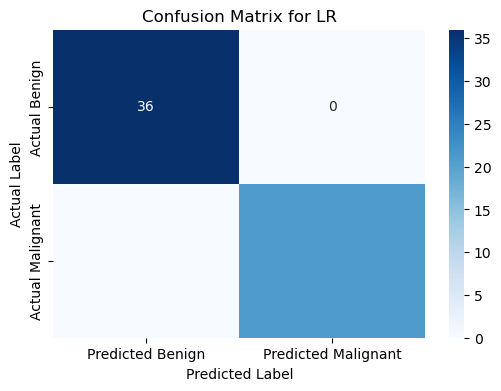

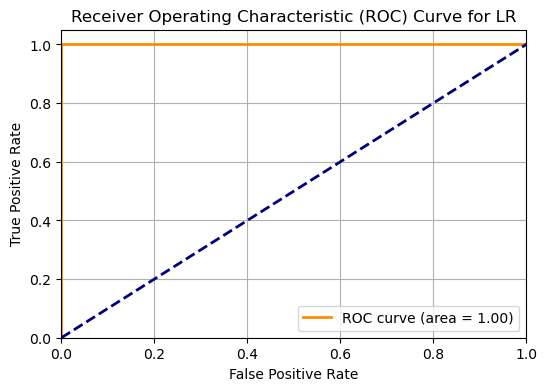


--- Evaluating Dtree ---
Accuracy: 0.9298
Confusion Matrix:
 [[35  1]
 [ 3 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.95      0.86      0.90        21

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57

ROC AUC: 0.9345


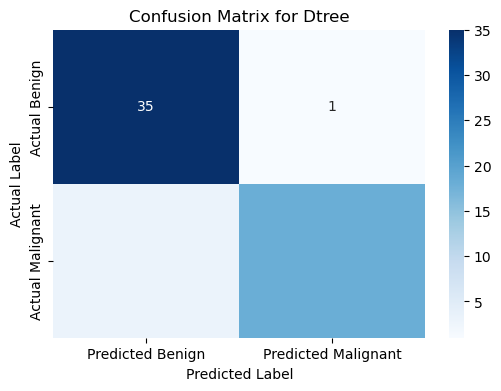

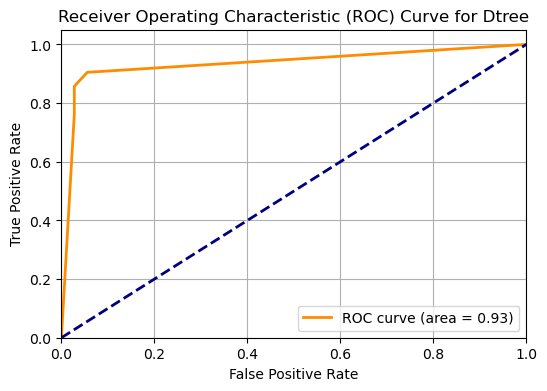


--- Evaluating RFPlain ---
Accuracy: 0.9649
Confusion Matrix:
 [[36  0]
 [ 2 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.90      0.95        21

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57

ROC AUC: 0.9960


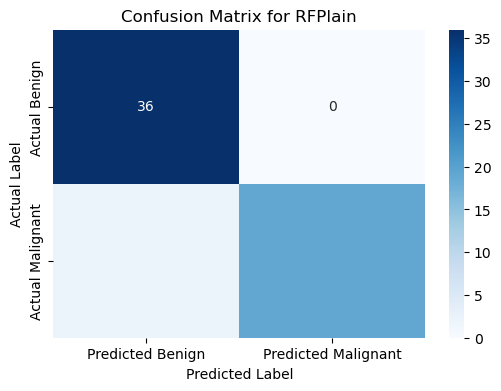

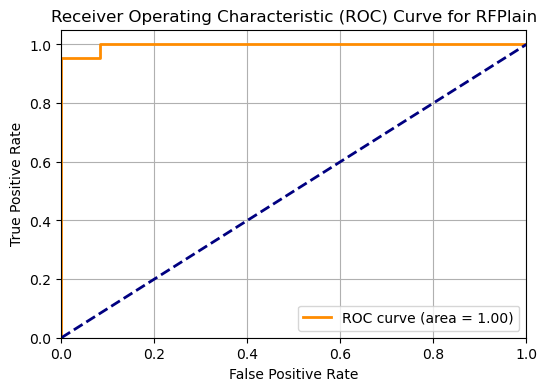


--- Evaluating RF200 ---
Accuracy: 0.9649
Confusion Matrix:
 [[36  0]
 [ 2 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.90      0.95        21

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57

ROC AUC: 0.9907


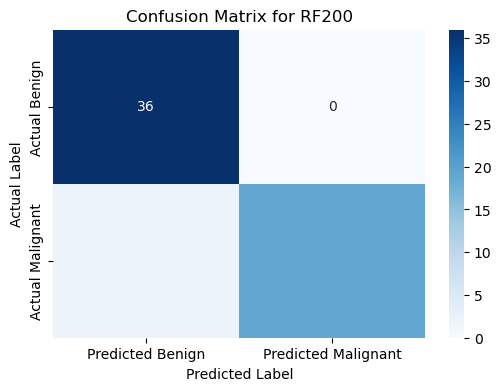

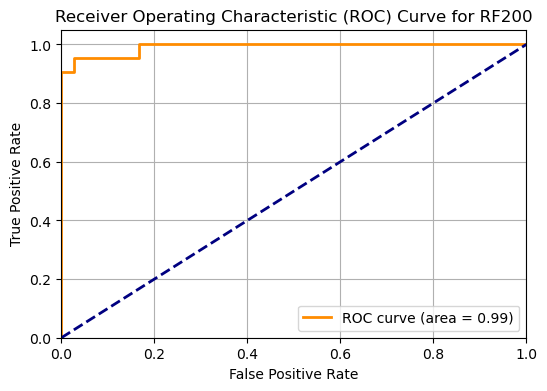


--- Evaluating CustomRF ---
Accuracy: 0.9298
Confusion Matrix:
 [[34  2]
 [ 2 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.90      0.90      0.90        21

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57

ROC AUC: 0.9921


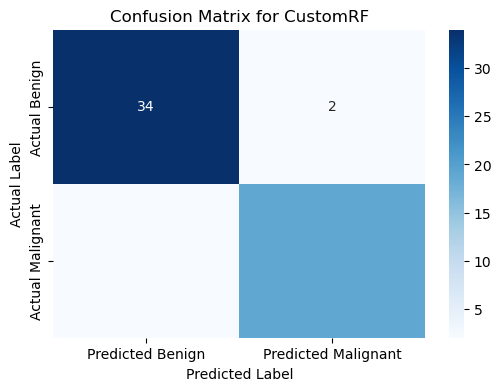

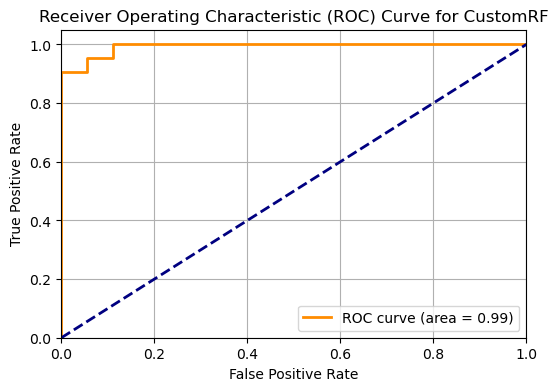


--- Evaluating XGBoost ---
Accuracy: 0.9649
Confusion Matrix:
 [[36  0]
 [ 2 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.90      0.95        21

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57

ROC AUC: 1.0000


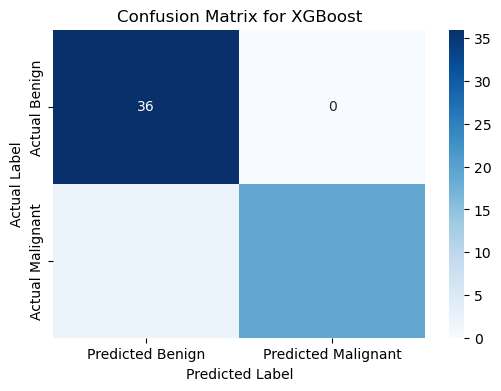

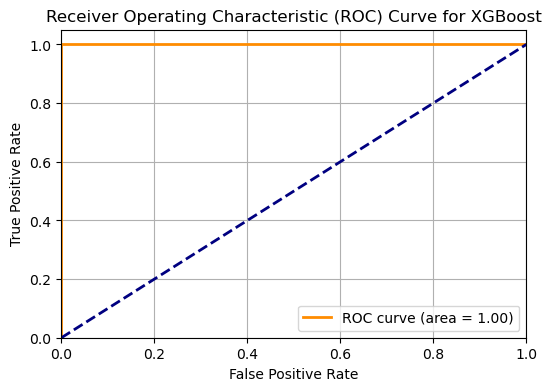


--- Evaluating SVC ---
Accuracy: 0.9825
Confusion Matrix:
 [[36  0]
 [ 1 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.95      0.98        21

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57

ROC AUC: 1.0000


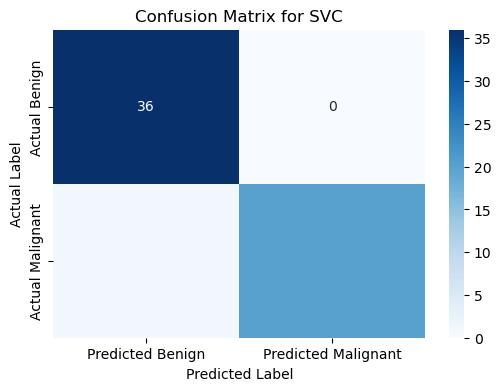

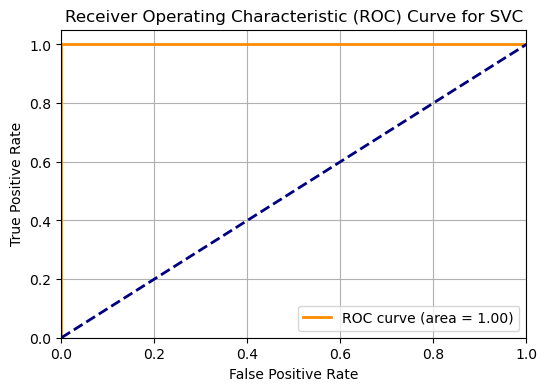


--- Evaluating CustomSVC ---
Accuracy: 1.0000
Confusion Matrix:
 [[36  0]
 [ 0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        21

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

ROC AUC: 1.0000


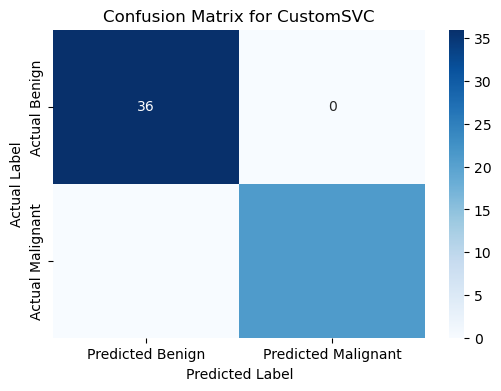

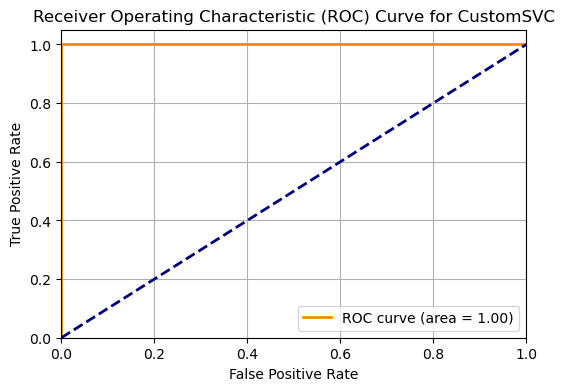

In [186]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
models = {
         'LR': LogisticR,
         'Dtree':decision_tree_model,
         'RFPlain': RandomForestClassifier(),
         'RF200':RandomForestClassifier(n_estimators=200, max_depth = 4, 
                                             min_samples_split = 30),
         'CustomRF': random_forest_model,
         'XGBoost': XGBClassifier(tree_method = 'approx', learning_rate= 0.07, max_depth= 4, n_estimators= 197, subsample= 0.58),
         'SVC':SVC(probability=True),
         'CustomSVC':CustomSVC,
        }

results = {}

for name, model in models.items():
    print(f"\n--- Evaluating {name} ---")
    model.fit(x_train_scaled, ytrain)
    # Predict on the test set
    y_pred = model.predict(x_test_scaled)
    y_pred_proba = model.predict_proba(x_test_scaled)[:, 1] # Probability for ROC curve

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'ROC AUC': roc_auc
    }

    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Benign', 'Predicted Malignant'],
                yticklabels=['Actual Benign', 'Actual Malignant'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [187]:
import pandas as pd
import numpy as np # For array handling if needed, though direct parsing is fine here

metrics_data = results

# Prepare data for the summary table
summary_rows = []
for model_name, data in metrics_data.items():
    accuracy = data['Accuracy']
    roc_auc = data['ROC AUC']
    conf_matrix = data['Confusion Matrix']

    # Extract metrics for Class 1 (Malignant) from the classification report string
    # A more robust way would be to parse the string, but given the fixed format,
    # we can directly extract from the string or recalculate from confusion matrix
    # For simplicity, let's extract or compute them
    
    # Confusion Matrix: [[TN, FP], [FN, TP]]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]

    # Calculate metrics for Class 1 (Malignant)
    # Handle division by zero for precision/recall if applicable
    precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0

    summary_rows.append({
        "Model": model_name,
        "Accuracy": f"{accuracy:.4f}",
        "Precision (Malignant)": f"{precision_1:.4f}",
        "Recall (Malignant)": f"{recall_1:.4f}",
        "F1-Score (Malignant)": f"{f1_score_1:.4f}",
        "ROC AUC": f"{roc_auc:.4f}",
        "False Negatives (FN)": FN,
        "False Positives (FP)": FP
    })

summary_table = pd.DataFrame(summary_rows)
summary_table = summary_table.set_index("Model")

print("--- Model Performance Summary Table (on Test Set) ---")
print(summary_table)

--- Model Performance Summary Table (on Test Set) ---
          Accuracy Precision (Malignant) Recall (Malignant)  \
Model                                                         
LR          1.0000                1.0000             1.0000   
Dtree       0.9298                0.9474             0.8571   
RFPlain     0.9649                1.0000             0.9048   
RF200       0.9649                1.0000             0.9048   
CustomRF    0.9298                0.9048             0.9048   
XGBoost     0.9649                1.0000             0.9048   
SVC         0.9825                1.0000             0.9524   
CustomSVC   1.0000                1.0000             1.0000   

          F1-Score (Malignant) ROC AUC  False Negatives (FN)  \
Model                                                          
LR                      1.0000  1.0000                     0   
Dtree                   0.9000  0.9345                     3   
RFPlain                 0.9500  0.9960                     

**Logistic Regression, Custom SVC, and SVC are potentially the best models. <br>
Setting the baseline level of performance - Existing breast classification can achieve an accuracy of 98%. Therefore, Logistic Regression and SVC can be the way to go.**